# Exercise: Geographical Cluster Analysis of Taxi Rides
Using the NY Taxi data set (see Use Case Block I) and the use case from the lecture...

In [64]:
import pandas as pd
import numpy as np
import folium
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# we load the data we have saved after wrangling and pre-processing in block I
train=pd.read_csv('../../DATA/train_cleaned.csv')

In [3]:
#select only the culumns with the ride coordinates
coordinates = train[ ['pickup_latitude','pickup_longitude','dropoff_latitude' , 'dropoff_longitude' ] ]

## Clustering approach from the lecture
we will be using simple K-Means:
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [4]:
from sklearn.cluster import KMeans

In [74]:
#define number of clusters and create instance
clusters=10
myKMeans=KMeans(n_clusters=clusters, n_jobs=-1)#parallelize to all cores

In [75]:
%%time
#train model
myKMeans.fit(coordinates.to_numpy()[:100000,:])#use only subset of the data to make it faster

D:\Programme\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Wall time: 4.49 s


KMeans(n_clusters=10, n_jobs=-1)

In [8]:
#get cluster centers
centers=myKMeans.cluster_centers_
    

In [9]:
#draw map: green: start, red: end
cluster_map = folium.Map(location = [40.730610,-73.935242],zoom_start = 12,)
for i in range(clusters):
    folium.CircleMarker([centers[i,0], centers[i,1]], radius=3,                
                        color="green", 
                        fill_opacity=0.9
                       ).add_to(cluster_map)
    folium.CircleMarker([centers[i,2], centers[i,3]], radius=3,                
                        color="red", 
                        fill_opacity=0.9
                       ).add_to(cluster_map)
    folium.PolyLine([ [centers[i,0],centers[i,1]] , [centers[i,2],centers[i,3]]  ], color="black", weight=2.5, opacity=1).add_to(cluster_map)

In [10]:
cluster_map

## Exercise 1
Write a function ```show_cluster(cluster_number,...)``` that draws the cluster centers and all start and end points of a given cluster in the map.
* use the ```predict()``` method to map all data in ```train_data``` to a cluster center
* use ```folium.CircleMarker``` to draw all members of a given cluster


In [16]:
def show_cluster(cluster_number,model,data):
    result = model.predict(data)
    cluster_map = folium.Map(location = [40.730610,-73.935242],zoom_start = 12,)
    cluster = data[result == cluster_number]
    for i in range(len(cluster)):
        folium.CircleMarker([cluster[i,0], cluster[i,1]], radius=3,                
                        color="green", 
                        fill_opacity=0.9
                       ).add_to(cluster_map)
        folium.CircleMarker([cluster[i,2], cluster[i,3]], radius=3,                
                        color="red", 
                        fill_opacity=0.9
                       ).add_to(cluster_map)
    return cluster_map
            
map = show_cluster(6,myKMeans,coordinates.to_numpy()[:100000,:])
map

## Exercise 2
Write a function ```cluster_var(cluster_number,...)``` that computes the intra- and extra cluster variance for a given cluster. Apply it to all clusters and compare the results for k=100 and k=10.

## k = 100

(0.01037117458515509, 0.07199427639129846)

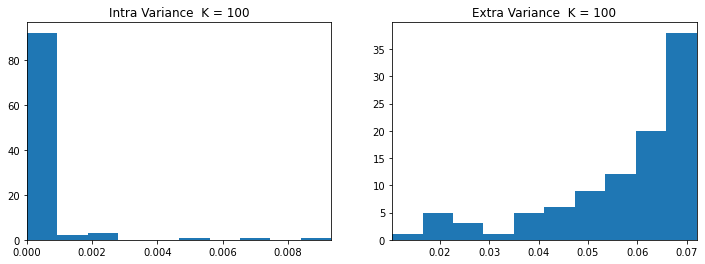

In [73]:
def cluster_var(cluster_number,model,data):
    
    #get all data
    result = model.predict(data)
    centers = model.cluster_centers_
    center = centers[cluster_number]
    cluster = data[result == cluster_number]

    # calculate inta variance
    distances_cluster = np.linalg.norm(cluster-center, axis=-1)
    intra = np.var(distances_cluster)
    
    # calculate extra variance
    distances_centers = np.linalg.norm(centers-center, axis=-1)
    extra = np.var(distances_centers)
    
    return intra, extra

# calculate the variances of all clusters
intra = np.zeros(clusters)
extra = np.zeros(clusters)
for i in range(clusters):
    intra[i], extra[i] = cluster_var(i,myKMeans,coordinates.to_numpy()[:100000,:])


# plot variances
fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].hist(intra)
axes[0].set_title("Intra Variance  K = " + str(clusters))
axes[0].set_xlim((min(intra), max(intra)))

axes[1].hist(extra)
axes[1].set_title("Extra Variance  K = " + str(clusters))
axes[1].set_xlim((min(extra), max(extra)))

## k = 10

(0.06884920112484942, 0.12049275372284274)

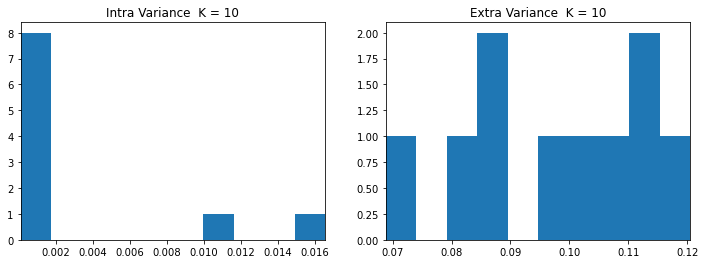

In [76]:
def cluster_var(cluster_number,model,data):
    
    #get all data
    result = model.predict(data)
    centers = model.cluster_centers_
    center = centers[cluster_number]
    cluster = data[result == cluster_number]

    # calculate inta variance
    distances_cluster = np.linalg.norm(cluster-center, axis=-1)
    intra = np.var(distances_cluster)
    
    # calculate extra variance
    distances_centers = np.linalg.norm(centers-center, axis=-1)
    extra = np.var(distances_centers)
    
    return intra, extra

# calculate the variances of all clusters
intra = np.zeros(clusters)
extra = np.zeros(clusters)
for i in range(clusters):
    intra[i], extra[i] = cluster_var(i,myKMeans,coordinates.to_numpy()[:100000,:])


# plot variances
fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].hist(intra)
axes[0].set_title("Intra Variance  K = " + str(clusters))
axes[0].set_xlim((min(intra), max(intra)))

axes[1].hist(extra)
axes[1].set_title("Extra Variance  K = " + str(clusters))
axes[1].set_xlim((min(extra), max(extra)))